In [1]:
# 코드 7-7 텐서보드를 사용한 텍스트 분류 모델
import keras
from keras import layers
from keras.datasets import imdb
from keras.preprocessing import sequence

max_features = 2000
max_len = 500

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=max_len)
x_test = sequence.pad_sequences(x_test, maxlen=max_len)

model = keras.models.Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len, name='embed'))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1))
model.summary()
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=['acc'])

Using TensorFlow backend.


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embed (Embedding)            (None, 500, 128)          256000    
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 494, 32)           28704     
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 98, 32)            0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 92, 32)            7200      
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 291,937
Trainable params: 291,937
Non-trainable params: 0
________________________________________________

In [2]:
callbacks = [
  keras.callbacks.TensorBoard(
    log_dir='my_log_dir', # 저장될 path
    histogram_freq=1, # 1 에포크마다 활성화 출력의 히스토그램을 기록
    embeddings_freq=1, # 1 에포크마다 임베딩 데이터를 기록
  )
]
hitory = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_split=0.2, callbacks=callbacks)

C:\Users\JW\.conda\envs\venv\lib\site-packages\keras-2.3.1-py3.6.egg\keras\callbacks\tensorboard_v2.py:102: UserWarning: The TensorBoard callback does not support embeddings display when using TensorFlow 2.0. Embeddings-related arguments are ignored.
  warnings.warn('The TensorBoard callback does not support '
C:\Users\JW\.conda\envs\venv\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 20000 samples, validate on 5000 samples
Epoch 1/20
20000/20000 [==============================] - 68s 3ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 2/20
20000/20000 [==============================] - 70s 4ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 3/20
20000/20000 [==============================] - 72s 4ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 4/20
20000/20000 [==============================] - 72s 4ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 5/20
20000/20000 [==============================] - 72s 4ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 6/20
20000/20000 [==============================] - 71s 4ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc: 0.5062
Epoch 7/20
20000/20000 [==============================] - 72s 4ms/step - loss: 7.7364 - acc: 0.4985 - val_loss: 7.6168 - val_acc:

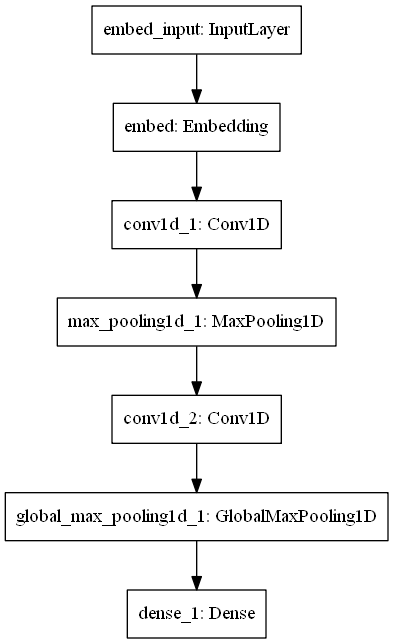

In [2]:
from keras.utils import plot_model
plot_model(model, to_file = 'model.png')

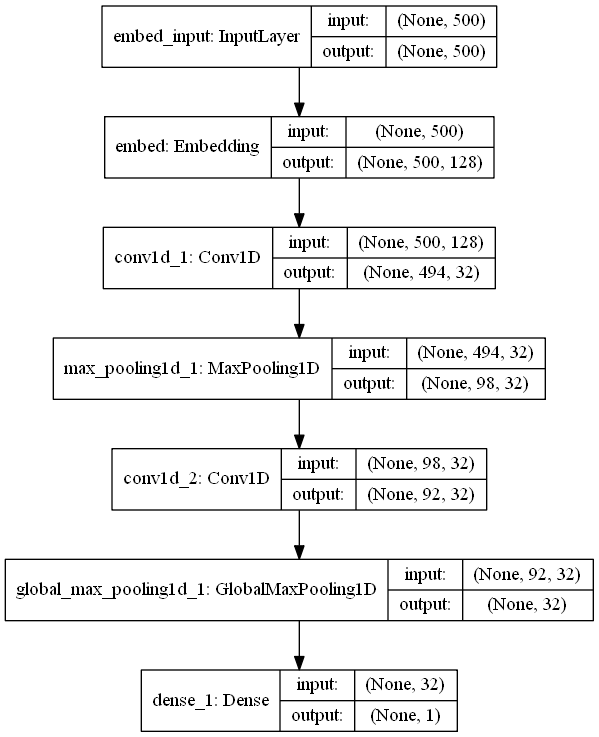

In [3]:
from keras.utils import plot_model
plot_model(model, show_shapes = True, to_file = 'model.png')

In [6]:
conda install pydot

Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\JW\.conda\envs\venv

  added / updated specs:
    - pydot


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2019.10.16 |                0         163 KB
    pydot-1.4.1                |           py36_0          43 KB
    ------------------------------------------------------------
                                           Total:         206 KB

The following NEW packages will be INSTALLED:

  pydot              pkgs/main/win-64::pydot-1.4.1-py36_0

The following packages will be UPDATED:

  ca-certificates                               2019.8.28-0 --> 2019.10.16-0




ca-certificates-2019 | 163 KB    |            |   0% 
ca-certificates-2019 | 163 KB    | #9         |  20% 
ca-certificates-2019 | 163 KB    | ########## | 100% 

pydot-1.4.1          | 43 KB     |            |   